190723 조진욱

Home credit default risk competition https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!pip install kaggle

In [0]:
!kaggle competitions download -c home-credit-default-risk

  0% 0.00/117k [00:00<?, ?B/s]
100% 117k/117k [00:00<00:00, 43.3MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 53.5MB/s]
 83% 30.0M/36.1M [00:00<00:00, 41.5MB/s]
100% 36.1M/36.1M [00:00<00:00, 73.5MB/s]
 90% 33.0M/36.8M [00:00<00:00, 42.7MB/s]
100% 36.8M/36.8M [00:00<00:00, 82.9MB/s]
 72% 41.0M/56.8M [00:00<00:00, 45.3MB/s]
100% 56.8M/56.8M [00:00<00:00, 89.5MB/s]
 98% 75.0M/76.3M [00:00<00:00, 89.5MB/s]
100% 76.3M/76.3M [00:00<00:00, 130MB/s] 
 87% 84.0M/96.7M [00:00<00:00, 67.2MB/s]
100% 96.7M/96.7M [00:01<00:00, 95.2MB/s]
 98% 106M/109M [00:01<00:00, 67.7MB/s] 
100% 109M/109M [00:01<00:00, 75.0MB/s]
 96% 259M/271M [00:02<00:00, 99.5MB/s]
100% 271M/271M [00:02<00:00, 103MB/s] 
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 38.1MB/s]


In [0]:
!unzip /content/sample_submission.csv.zip
!unzip /content/previous_application.csv.zip
!unzip /content/bureau_balance.csv.zip
!unzip /content/application_test.csv.zip
!unzip /content/credit_card_balance.csv.zip
!unzip /content/application_train.csv.zip
!unzip /content/installments_payments.csv.zip
!unzip /content/HomeCredit_columns_description.csv.zip
!unzip /content/bureau.csv.zip

Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/previous_application.csv.zip
  inflating: previous_application.csv  
Archive:  /content/bureau_balance.csv.zip
  inflating: bureau_balance.csv      
Archive:  /content/application_test.csv.zip
  inflating: application_test.csv    
Archive:  /content/credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  
Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   
Archive:  /content/installments_payments.csv.zip
  inflating: installments_payments.csv  
unzip:  cannot find or open /content/HomeCredit_columns_description.csv.zip, /content/HomeCredit_columns_description.csv.zip.zip or /content/HomeCredit_columns_description.csv.zip.ZIP.
Archive:  /content/bureau.csv.zip
  inflating: bureau.csv              



필사 시작
---
Read in data


Imports

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system management
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# List files available
print(os.listdir('/content/'))


['.config', 'application_train.csv.zip', 'application_test.csv', 'sample_submission.csv.zip', 'credit_card_balance.csv', 'drive', 'installments_payments.csv.zip', 'bureau.csv.zip', 'previous_application.csv.zip', 'bureau_balance.csv.zip', 'credit_card_balance.csv.zip', 'application_test.csv.zip', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'installments_payments.csv', 'HomeCredit_columns_description.csv', 'bureau_balance.csv', 'sample_submission.csv', 'POS_CASH_balance.csv.zip', 'sample_data']


In [0]:
# Traininig data
app_train = pd.read_csv('/content/application_train.csv')
print("Training data shape:", app_train.shape )
app_train.head()


Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Testinig data
app_test = pd.read_csv('/content/application_test.csv')
print("Testing data shape:", app_train.shape )
app_test.head()


Testing data shape: (307511, 122)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Exploratory Data Analysis
---



In [0]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

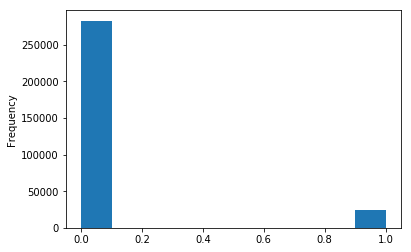

In [0]:
app_train['TARGET'].astype(int).plot.hist();

imbalance 데이터라서 나중에 class 를 weighting 할 수 있다? http://xgboost.readthedocs.io/en/latest/parameter.html

Examine missing values

In [0]:
# Function to calculate missing values by column# Funct

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1:'% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending = False).round(1)
    
    #Print some summary info
    print('You selected dataframe has' + str(df.shape[1]) + 'There are' + str(mis_val_table_ren_columns.shape[0]) + "columns that have missing value")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
    

In [0]:
# Missing values stat
missing_values = missing_values_table(app_train)
missing_values.head(20)

You selected dataframe has122There are67columns that have missing value


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


XGBoost 같은 모델들은 따로 imputation 할 필요 없이 missing values 이용 가능. 

Column Types

In [0]:
# Number of each type of col
app_train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [0]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Encoding Cate Var

Light GBM 같은 모델들은 카테고리컬 도 가능하지만 보통 카테고리걸은 잘 못함 . 

Label encoding and one hot encoding

클래스 2개 는 레이블, 그 이상 클래스는 원핫 인코딩

sklearn 레이블 인코더 랑 pd.getdummies 쓸거임

In [0]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns

for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many cols were label encoded
            le_count += 1
        continue   
        
print('%d columns were label encoded' % le_count)


3 columns were label encoded


In [0]:
# one-hot encoding of cat variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training features shape:', app_train.shape)
print('Testing features shape:', app_test.shape)


Training features shape: (307511, 243)
Testing features shape: (48744, 239)



Aligning Training and Testing Data
---

트레이닝 데이터에 테스트 데이터 보다 더많은 열이 생겼음. 더 많은 카테고리 변수가 있었기 때문. align 을 이용해서 할건데, 일단 훈련 데이터에서 그걸 빼놓고 해야함. axis = 1 로 해야지 열이 바뀜!

In [0]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only cols present in both dataframe
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in 
app_train['TARGET'] = train_labels

print('Training features shape:', app_train.shape)
print('Testing features shape:', app_test.shape)

Training features shape: (307511, 240)
Testing features shape: (48744, 239)


인코딩 덕에 피쳐수가 매우 많아졌으므로, 나중에 제대로 하려면 dimension reduction 기법을 사용해야할 것임


Back to EDA
---
Anomalies 변칙 이례

eda 를 할 때 우리가 보길 원하는 한 문제는 anomalies 임. mis typed 일수도 있고 에러일수도있고, 극한의 상황에선 그게 맞을 수도 있음. 보통 통계적으로 봄. describe 메서드 사용. days_birth 열은 음수인데 왜냐면 그들이 현재 loan 신청한 것과 관련되어있기 때문임. 이러한 수년간의 통계를 보려면, 우리는 -1 을 곱하고 1년의 날짜 만큼 나눠야함


In [0]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

나이를 이렇게 본다면 꽤나 reasonable 하다. 최대 최소값을 본다면 딱히 아웃라이어가 보이지 않음. 

In [0]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

max year 이 천년이 넘으므로 말이 안됨

Text(0.5, 0, 'Days Employment')

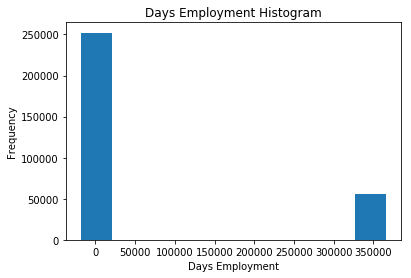

In [0]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

특이한 사람들이 다른 고객들보다 default 하는 비율이 높거나 낮은지 알아보기

In [0]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


anomalies 가 보통 보다 낮은 rate of default 를 가지고 있음. 보통 이례를 다루는 건 missing 이라고 생각하고 imputation 을 하는 방법이 있음. 그런 경우 이례값들은 모두 같은 값이 되고, 그말은 이례값들이 모두 무언가 공통되었다고 생각하는 것임. 

이번엔 숫자가 아니고 nan 값을 준뒤 boolean col 을 만들어서 anomalous 인지 아닌지를 나타낼 것임

Text(0.5, 0, 'Days Employment')

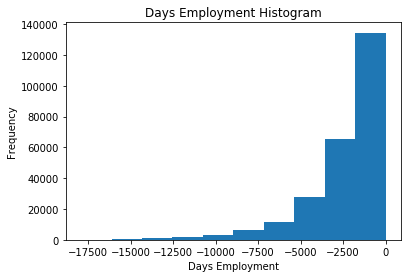

In [0]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replac the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')
#

트레이닝 데이터를 가지고 장난칠때 항상 염두해둬야할 건 테스트 데이터로도 그것을 똑같이 해야한 다는 것임

In [0]:
# Create an anomalous flag column
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

# Replac the anomalous values with nan
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries



Correlation
---
http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf\

.00-.19 “very weak”\
.20-.39 “weak”\
.40-.59 “moderate”\
.60-.79 “strong”\
.80-1.0 “very strong”

In [0]:
# Find correlations with the target and sort
corr = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(15))
print('Most Negative Correlations:\n', corr.head(15))


Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most Negativ

day_birth 가 그래도 좀 높은 편임. 계수값은 양수인데 value of this feature 이 음수 이므로, 그말은 client 가 나이가 들면, 그들이 더 적게 default the loan 한 다는 것을 말함. 이것은 약간 혼동의 여지가 있기에 abs 를 취하는 게 나음


Effect of Age on Replayment
---



In [0]:
# Find the correlation of the positive days since birth and target 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])


-0.07823930830982694

나이 히스토그램 만들기 

Text(0, 0.5, 'Count')

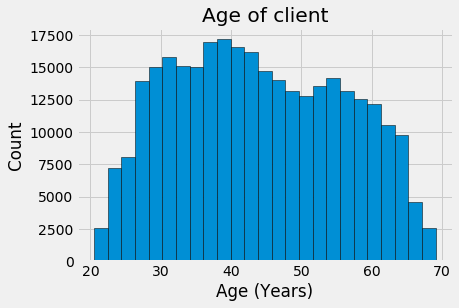

In [0]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins=25)
plt.title('Age of client'); plt.xlabel('Age (Years)'); plt.ylabel('Count')



hist 만 봐선 아웃라이어가 없다 정도만 보이기에 kde plot 을 그려볼 거임

Text(0.5, 1.0, 'Distribution of Ages')

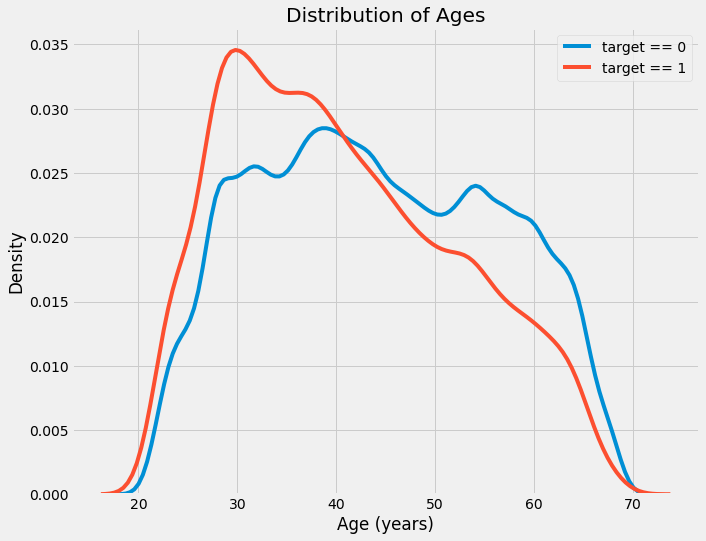

In [0]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time or not
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')


target 1 이 어린 애들 쪽 에 skewed 되어있으므로이게 딱히 significant 한 관계는 아니여도 아마 꽤나 유용한 정보가 될 것 같음. 일단 타겟에 영향을 미치니깐!

age bracket 에 따라 kde plot 을 다시 그려보기. pd.cut 을 사용하여 5년 마다 bin 을 만들 것임 타겟에 대한 평균값을 계산해 각 age 카테고리마다 얼마나 안갚았는지를 볼것임

In [0]:
# Age information into a seperate df
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [0]:
# Group by the bin and calculate avg

age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by age group')

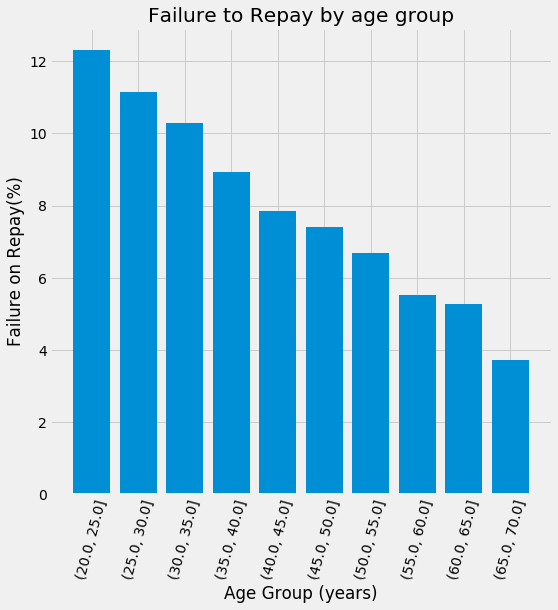

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the avg of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure on Repay(%)')
plt.title('Failure to Repay by age group')


어린 신청자들이 잘 갚지 못한다는 것이 보임.  

Exterior Sources 

외부에서 온 자료들을 섞은것인데, 무엇인지 모르므로 일단 보기

In [0]:
# Extract the EXT_Source var and show corr

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs


,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

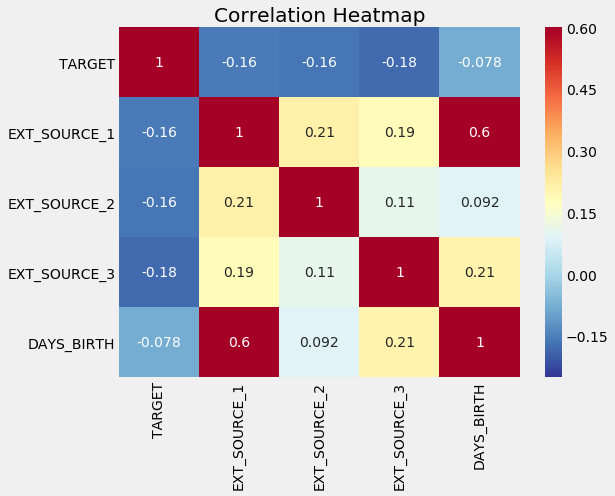

In [0]:
plt.figure(figsize = (8, 6))

# Heatmap of corr
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Heatmap')


외부 요소들이 음의 관계를 가진다는 것을 볼 수 있음. days_birth 가 외부요소 1과 관계가 있다는 것을 보아 그것의 점수 중 하나가 고객의 나이라는 것을 생각할 수 있음 . 

이젠 각각의 피쳐들에 대해서 분포를 색으로 나타내 볼 것임 

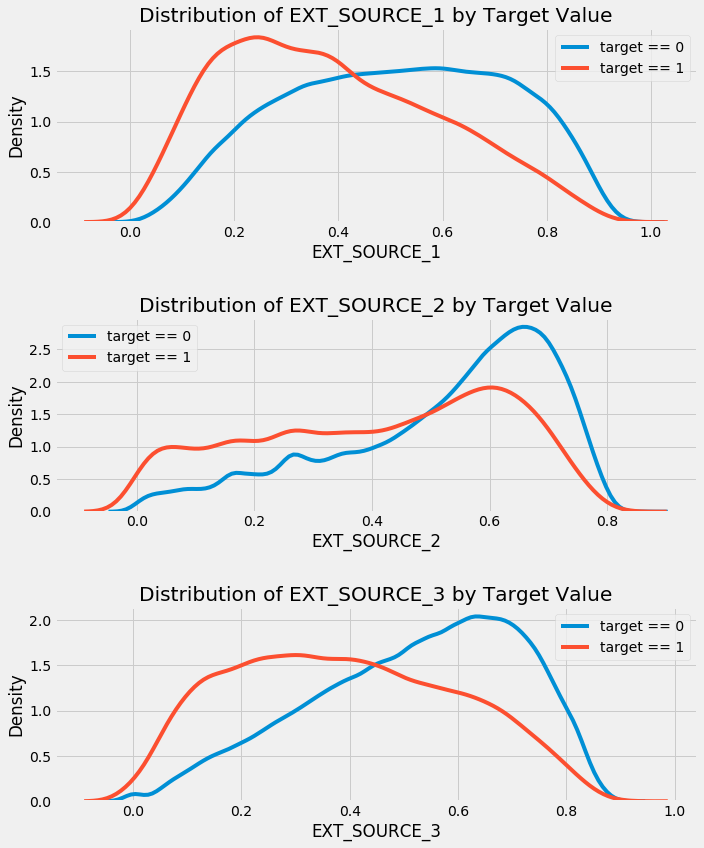

In [0]:
plt.figure(figsize = (10, 12))

# iterate thr the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)    

외부요소 3 이 타겟에 따라 가장 큰 차이를 보임. 확실하게 여기에선 둘의 차이를 볼 수 있음. 관계가 강한 편은 아님. 그러나 머신러닝에서 그들이 제시간에 낼 수 있는지 없는지를 판단하는 데 이정도면 괜찮음


Pair Plot
---
EDA 마지막으로 페어 플랏을 할것임. 페어 플랏은 다양한 변수 페어들간의 관계를 보는데 유리하면서도 하나 씩의 변수들을 보는데도 좋음. sns 의 PairGrid 메서드를 쓸 것임 \
scatter plots on upper trigangle, \
histograms on the diagonal, \
2d kde and corr coefficient on lower triangle


Text(0.5, 1.05, 'Ext source and Age features pairs plot')

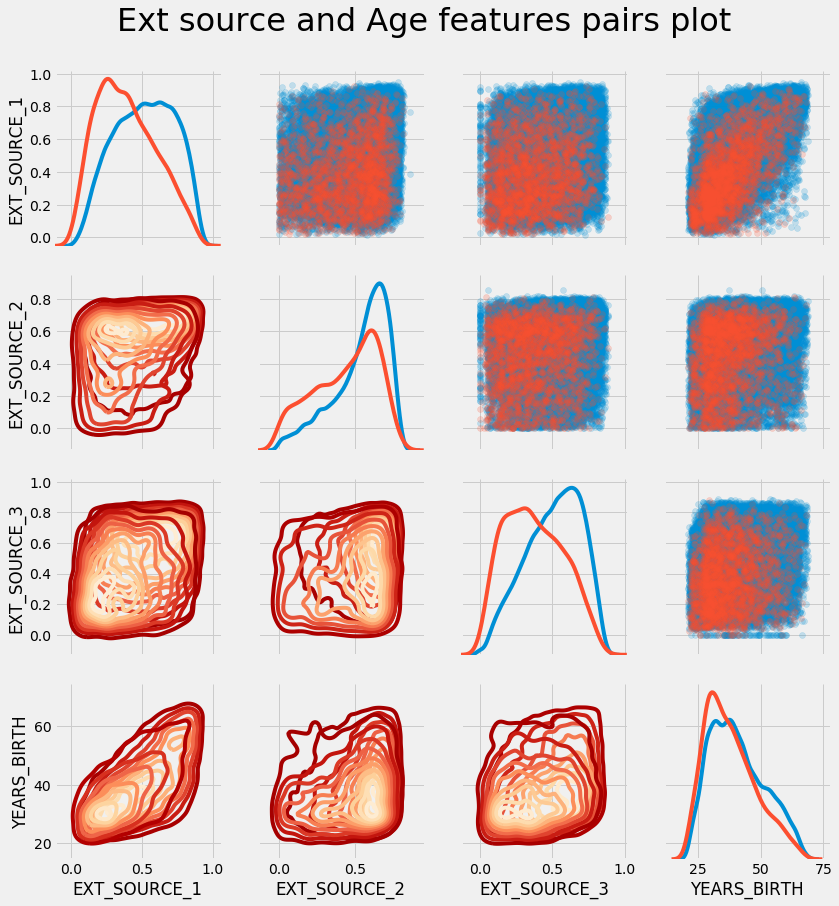

In [0]:
# Copy the dat for plotting
plot_data = ext_data.drop(columns= ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate corr coefficient betw two cols

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8), xycoords=ax.transAxes,
               size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, hue='TARGET',
                   vars= [x for x in list(plot_data.columns) if x != 'TARGET'])
    
# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext source and Age features pairs plot', size = 32, y = 1.05)

빨간 색은 loan 인데 돌려받지 못한 것이고 파랑은 받은 것임. 이걸 보면 외부요소1 와 days_birth(years_birth)와 적당한 양의 선형관계를 보이는 것을 볼 수 있는데, 이 말은 외부요소가 나이와 어떤 관련이 있다라고 해석할 수 있음

# Feature Engineering

구조화된 데이터는 gradient boosting 을 통해 좋은 피쳐를 찾는게 필수임. 피쳐 엔지니어링이 제일 중요함

https://www.featurelabs.com/blog/secret-to-data-science-success/

\
이 데이터가 우리가 하려는 task 에 맞도록 하는 것은 데이터 사이언티스트의 해야할 일임

feature ext 와 sel  

여기선 일단 다항 피쳐와 도메인 지식이 필요한 피쳐만 사용할 것


Polynomial Features
---

여러 항들을 곱하거나 더하거나 제곱하거나 로그취하거나 하면서 바꾸는 방식. 이런식으로 만들어지는 다양한 변수들은 interaction terms 라고 불림. 왜냐면 이것들이 변수간의 상호행동을 보여주기 때문. 즉 다양한 짓을 하다보면 좋은 피쳐를 뽑을 수도 있다. 

Interaction term 는 통계에선 많이 쓰는데 머신러닝에서는 잘 안쓰임. 그래도 몇개는 써볼 것임 

sklearn 에서 PolynomialFeatures 라는 패키지를 사용할 것임 . degree 는 3 만 하는데, 왜냐면 feature의 수는 지수적으로 증가하고 오버피팅 문제가 발생할 수 있기 때문

In [0]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [0]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


이것은 새로은 피쳐들을 만들어주는데 get_feature_names 메서드를 사용해서 피쳐들의 이름을 찾아야한다.

In [0]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

degree 3 에의해 35 개의 피쳐 가 생겨났고 타겟과 관련성을 따져야함 

In [0]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


몇몇 새로운 변수들이 더 큰 상관관계를 가지고 있으므로 우리는 이러한 피쳐들을 사용해볼 수 있다. 나중에 비교를 하기 위해 copy 하고 추가할 것임

In [0]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training df
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into testing df
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the df
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)


Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)



Domain Knowledge Features
---

attempts at applying limited financial knowledge

상식적으로 중요한 피쳐들을 골라내기 

 Here I'm going to use five features that were inspired by this script by Aguiar:

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

from script
https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features

In [0]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [0]:

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

Visualize new variables
- kde plot colored by target

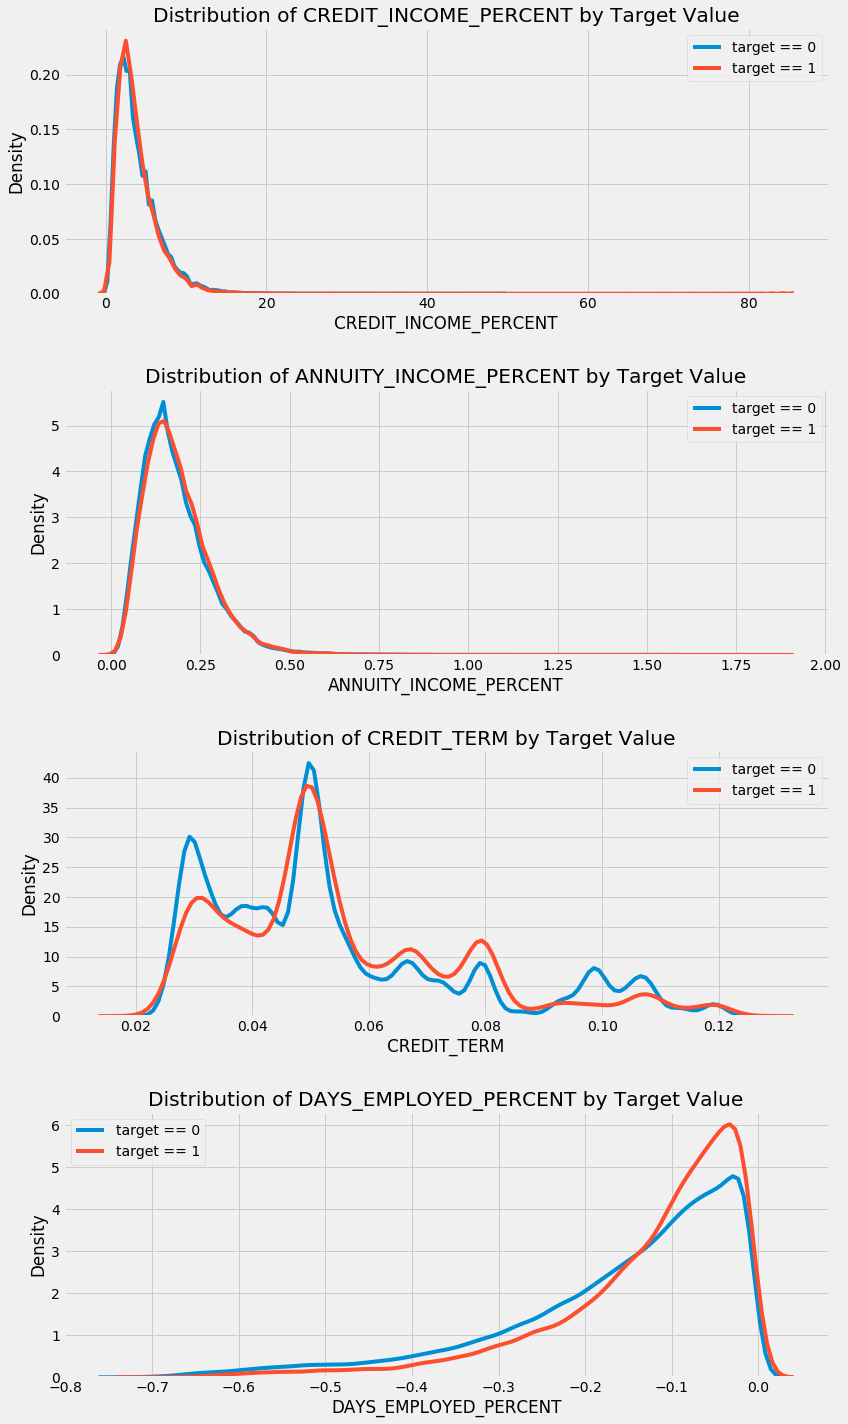

In [0]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    # create a new subplot
    plt.subplot(4, 1, i + 1)
    
    # plot kde
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Label 
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)    

이것만 봐서는 이 새로운 피쳐가 좋은 지를 알 수 없음. 그렇다고 머신러닝 모델에 안넣어 봐서는 안되고 그래도 직접 넣어봐야함

# Baseline

 (random guessing on a classification task will score a 0.5).https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5
 
 
 여기선 로지스틱 리그레션 사용할 것임
 
 그러기 위해서 카테고리컬을 인코딩 한 후 모든 피쳐를 사용해볼 것임 . 밑에선 전처리로 imputation, normalizatiion 등이 사용됨. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns= ['TARGET'])
else:
    train = app_train.copy()
    
# Featuer names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()


# Median Imputation
imputer = Imputer(strategy = 'median')

# Scale each featue to 0-1
scaler = MinMaxScaler(feature_range= (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repaet with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
    

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


sklearn 의 로지스틱 리그레션 모델에서 regularizatio narameter 값을 좀 낮춰서 오버피팅을 방지할 것임 (낮추면 보통 오버피팅 방지)

모델 만들고 - fit 사용하고 - predict_proba 같은 거 이용하면 됨(0, 1 분류면 predict)


In [0]:
from sklearn.linear_model import LogisticRegression

# Make model with the specified regularization param
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

predict.proba 는 m*2 array 를 생성함. m 은 여기서 인스턴스의 수(the number of observations)

첫 열은 target being 0 의 확률 두번째는 1의 확률 . 그러므로 row의 합은 항상 1. 

우리는 1의 확률, 그러니깐 갚지 못할 확률을 구해야하므로 second 열을 사용할 것임



In [0]:
# Make Predictions
# Make sure to select the second col only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [0]:
# Submission df

submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()


,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


In [0]:
# Save the submission to csv

submit.to_csv('log_reg_baseline.csv', index = False)


Improve model : Random Forest 
---



In [0]:
from sklearn.ensemble import RandomForestClassifier

# Make the rand for classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose =1, n_jobs = -1)


In [0]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make prediction
predictions = random_forest.predict_proba(test)[:, 1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [0]:
# Make a subimission df
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# save the sub df
submit.to_csv('random_forest_baseline.csv', index = False)



Make Predictions using Engineered Features
---



In [0]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.fit_transform(app_test_poly)

# Scale
scaler = MinMaxScaler(feature_range= (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.fit_transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators= 100, random_state=50, verbose=1, n_jobs= -1)


In [0]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions

predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [0]:
# Make a subimission df
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# save the sub df
submit.to_csv('random_forest_baseline_engineered.csv', index = False)


Testing Domain Features

In [0]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [0]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)


Model Interpretation : Feature importances
---

외부요소랑 데이버스가 가장 중요하다고 나와야할 것임. 나중엔 피쳐 임포턴스를 차원 축소할때 중요하게 사용함

In [0]:
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importance to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # Make a horizontal bar chart of feature importance
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align = 'center', edgecolor='k')    
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

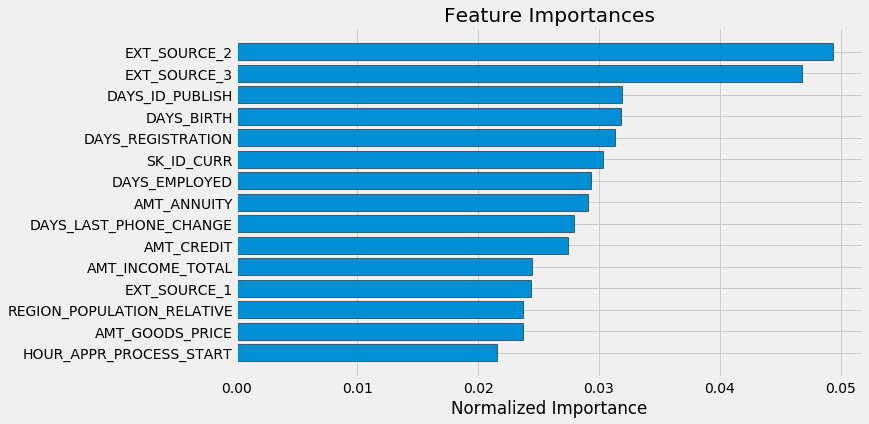

In [0]:
# show the featuer importance for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)


외부요소와 데이버스가 가장 중요하게 나왔고, 나머지를 보면 그닥 중요하지 않은 애들은 지워도 될 것처럼 보임. 오히려 이런 중요하지 않은 애들을 지우면 성능이 올라가는 경우도 있음. 이게 가장 최신 모델은 아니여도 적어도 모델이 판단 할 때 뭘 중요시 여기는 지 알 수 있음 

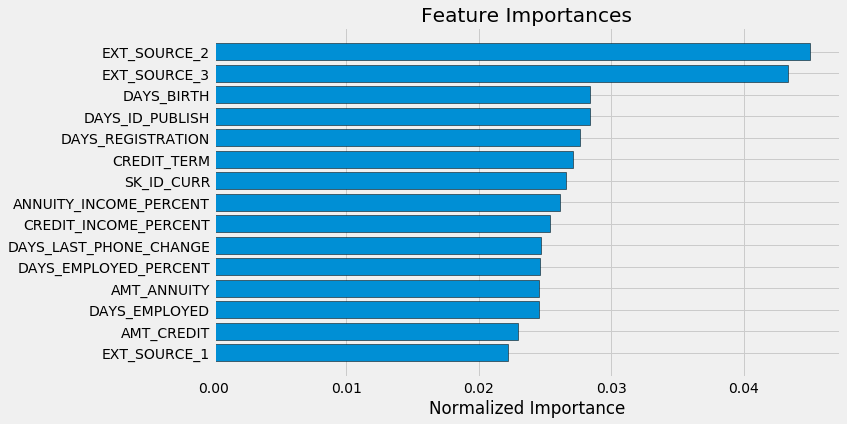

In [0]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

우리가 직접 만든 피쳐들이 탑 15 위 안에 모두 드는 것을 알 수 있음. 특히 도메인 널리지로 한 것들이 올라온 것을 보아 우리의 상식이 대체로 맞음을 확인 가능


# Just for fun  : Gradient Boosting Machine 

In [0]:
features = 1
test_features = 1

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    # One hot encoding
    if encoding =='ohe':
        features = pd.get_dummies(features)
        test_featues = pd.get_dummies(test_features)
        
        # Align the df by the cols
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No cate indices to record
        cat_indices = 'auto'
        
     # Integer label encoding
    elif encoding == 'le':
            
            # Create Label encoder
            label_encoder = LabelEncoder()
            
            # List for storing cate indices
            cat_indices = []
            
            # iterate thr each col
            for i, col in enumerate(features):
                if features[col].dtype == 'object':
                    # Map the cate features to integers
                    features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                    test_features[col] = label_encoder.fit_transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                    
                    # Record the cate indices
                    cat_indices.append(i)
                    
                    
      # catch error if label encoding scheme is not valid       
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)      
        
    # Extract feature name
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    test_predictions = np.zeros(test_features.shape[0])
    
    out_of_fold = np.zeros(features.shape[0])
    
    # List for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate thr each fold
    for train_indices,valid_indices in k_fold.split(features):
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                 eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                 eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                 early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:,1] /k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_scroe = model.best_score_['train']['auc']
        
        # clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission df
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance df
    feature_importances = pd.DataFrame({'feature': feature_importances, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating df of valid scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # df of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})
    
    return submission, feature_importances, metrics
    
    

In [0]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.762202	valid's bina

UnboundLocalError: ignored